# Kaggle ML and Data Science Survey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing all available data to pandas dataframe

In [39]:
mcq_data = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
conv_rates_data = pd.read_csv('conversionRates.csv',encoding='ISO-8859-1')
freeform_data = pd.read_csv('freeformResponses.csv',encoding='ISO-8859-1',low_memory=False)

In [40]:
mcq_data.head()
# conv_rates_data.head()
# freeform_data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
mcq_data.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [42]:
# Basic Analysis and Data cleaning 

total_responses = mcq_data.shape[0]
print("Total number of survey responses : ", total_responses)

total_country = mcq_data['Country'].nunique()
print("Total number of countries participated : ", total_country)

Total number of survey responses :  16716
Total number of countries participated :  52


## Most enthusiast data scientists Home Country

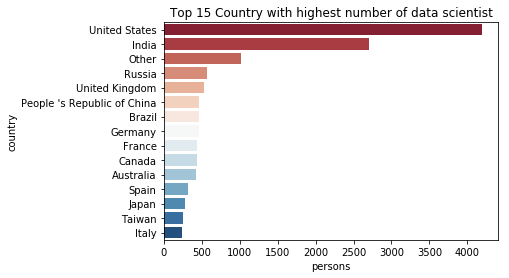

In [71]:
# Top 15 country with highest number of data scientist.
%matplotlib inline
data = mcq_data['Country'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.Country, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("country")
plt.figure(figsize=(15,8))
plt.show()

## Profession of most of the data scientist

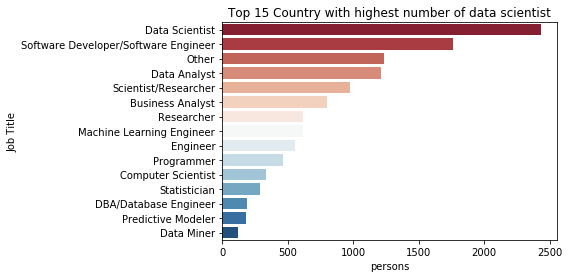

In [74]:
data = mcq_data['CurrentJobTitleSelect'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.CurrentJobTitleSelect, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("Job Title")
plt.show()

# # Compensation of data scientist 

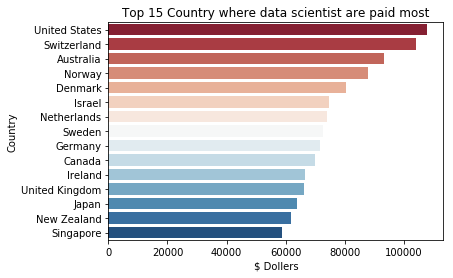

In [101]:
# Country wise compensation
salary = mcq_data[['Country','CompensationAmount','CompensationCurrency','EmploymentStatus']].dropna()
# sal_countrywise = 
salary = salary[salary['CompensationAmount'] != '-']
salary = salary[salary['CompensationAmount'] != '-99']
CompensationAmount = salary['CompensationAmount'].str.replace(',','').apply(pd.to_numeric)
salary.drop('CompensationAmount', axis=1)
salary['CompensationAmount'] = CompensationAmount

salary = salary.merge(conv_rates_data, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']

top15_country = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()


plt.title("Top 15 Country where data scientist are paid most")
sns.barplot(y=top15_country.index, x=top15_country.Salary, palette="RdBu")
plt.xlabel("$ Dollers")
plt.ylabel("Country")
plt.figure(figsize=(15,8))
plt.show()